# filtering and preprocessing data

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [55]:
data = pd.read_csv("../01_data_scraping/all_scraped_data.csv", usecols = ["comment_id", "comment_text"])
data.shape

(10216, 2)

In [56]:
data = data[data["comment_text"].isna() == False] # remove empty comments
data.shape

(9894, 2)

In [57]:
# Adding class labels: Collected data is not tagged as positive/negative/neutral.
#
# a. Select the number of target classes (2 or 3 if we include neutral).
target_classes = 3
# b. Clean data and remove stopwords
#
# c. Create word embeddings for vectorized representation of words simillar in meaning // OR we use pretrained model for language of choice
#
# d. Use K-MEANS to create clusters and use k=2 or k=3 depending on the numer of target classes
#
# e. Based on clusters tag data and manually fix clusters if necessary
#
# It is a good idea to limit the number of words as much as possible and possibly manually tag some of them too.
#
# 2. Data cleaning: normalisation, special characters removal, punctuation, URL, emails, duplicates, lowercase text and choose type of tokenizer. NOTICE: this stage is necessary BEFORE the creation of word embedding

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
from wordcloud import WordCloud
from tqdm import tqdm
tqdm.pandas()
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
data['comment_text'] = data['comment_text'].apply(lambda x: x.lower())
data['comment_text'][:15]

0     i subscribe to task master supermaxplus and on...
1     why wasn’t greg james cast for a full series? ...
2     i've had enough. they can't keep doing this to...
3     sir mo was a delight!!! now we need an all "hi...
4     i...did not expect to come out of that episode...
5     follow my logic here. normal taskmaster is ful...
6     just occurred to me it's a shame they'd alread...
7     but what you can't take away from mo is he had...
8     greg accidentally writing his own name on the ...
9     "if i hit you enough you might tell me where t...
10    they said the olympics/world championships/tas...
11    mo farah really surprised me. i didn't think h...
12    i wonder if they brought in josh to count thos...
13                                a hairdryer, i howled
14       “it’s taskmaster, it’s not supposed to be fun”
Name: comment_text, dtype: object

In [60]:
nlp = spacy.load('en_core_web_md', disable = ['ner', 'parser'])

In [61]:
def lemmatize(text):
    return ' '.join([x.lemma_ for x in nlp(text)])
data['comment_text'] = data['comment_text'].apply(lemmatize)
data['comment_text'][:15]

0     I subscribe to task master supermaxplus and on...
1     why be not greg james cast for a full series ?...
2     I 've have enough . they can not keep do this ...
3     sir mo be a delight ! ! ! now we need an all "...
4     I ... do not expect to come out of that episod...
5     follow my logic here . normal taskmaster be fu...
6     just occur to I it be a shame they would alrea...
7     but what you can not take away from mo be he h...
8     greg accidentally write his own name on the ca...
9     " if I hit you enough you might tell I where t...
10    they say the olympic / world championship / ta...
11    mo farah really surprise I . I do not think he...
12    I wonder if they bring in josh to count those ...
13                                 a hairdryer , I howl
14     " it ’ taskmaster , it ’ not suppose to be fun "
Name: comment_text, dtype: object

In [62]:
def remove_stopwords(text):
    return ' '.join(filter(lambda x: x not in nlp.Defaults.stop_words, text.split()))
data['comment_text'] = data['comment_text'].apply(remove_stopwords)
data['comment_text'][:15]
# it would probably be a good idea to remove names of hosts and contestants as well?
# then again it might be relevant who the commenters are talking about
# at the same time, the time for this project was limited and manually searching for everyone's names and nicknames can be quite time consuming
# overall looks like a named entity recognition problem for another project

0     I subscribe task master supermaxplus new year ...
1     greg james cast series ? fit alex look series ...
2     I . ! simply appalling introduce lovely hilari...
3     sir mo delight ! ! ! need " hilariously good s...
4     I ... expect come episode absolutely besotte m...
5     follow logic . normal taskmaster series length...
6             occur I shame use " hello " episode title
7                       away mo absolutely lovely day .
8                     greg accidentally write card lmao
9                " I hit tell I bucket . " " bucket . "
10    olympic / world championship / taskmaster treb...
11    mo farah surprise I . I think enter childlike ...
12    I wonder bring josh count pellet tell " champi...
13                                   hairdryer , I howl
14                     " ’ taskmaster , ’ suppose fun "
Name: comment_text, dtype: object

In [63]:
url_re = re.compile(r'((www.[^\s]+)|(https?://[^\s]+))')
data['comment_text'] = data['comment_text'].apply(lambda x: url_re.sub('', x))
data['comment_text'][:15]

0     I subscribe task master supermaxplus new year ...
1     greg james cast series ? fit alex look series ...
2     I . ! simply appalling introduce lovely hilari...
3     sir mo delight ! ! ! need " hilariously good s...
4     I ... expect come episode absolutely besotte m...
5     follow logic . normal taskmaster series length...
6             occur I shame use " hello " episode title
7                       away mo absolutely lovely day .
8                     greg accidentally write card lmao
9                " I hit tell I bucket . " " bucket . "
10    olympic / world championship / taskmaster treb...
11    mo farah surprise I . I think enter childlike ...
12    I wonder bring josh count pellet tell " champi...
13                                   hairdryer , I howl
14                     " ’ taskmaster , ’ suppose fun "
Name: comment_text, dtype: object

In [64]:
character_re = re.compile(r"[^a-z\s']")
data['comment_text'] = data['comment_text'].apply(lambda x: character_re.sub('', x))
data['comment_text'][:15]

0      subscribe task master supermaxplus new year t...
1     greg james cast series  fit alex look series  ...
2        simply appalling introduce lovely hilarious...
3     sir mo delight    need  hilariously good sport...
4       expect come episode absolutely besotte mo fa...
5     follow logic  normal taskmaster series length ...
6                occur  shame use  hello  episode title
7                        away mo absolutely lovely day 
8                     greg accidentally write card lmao
9                          hit tell  bucket    bucket  
10    olympic  world championship  taskmaster treble...
11    mo farah surprise    think enter childlike sur...
12     wonder bring josh count pellet tell  champion...
13                                     hairdryer   howl
14                            taskmaster   suppose fun 
Name: comment_text, dtype: object

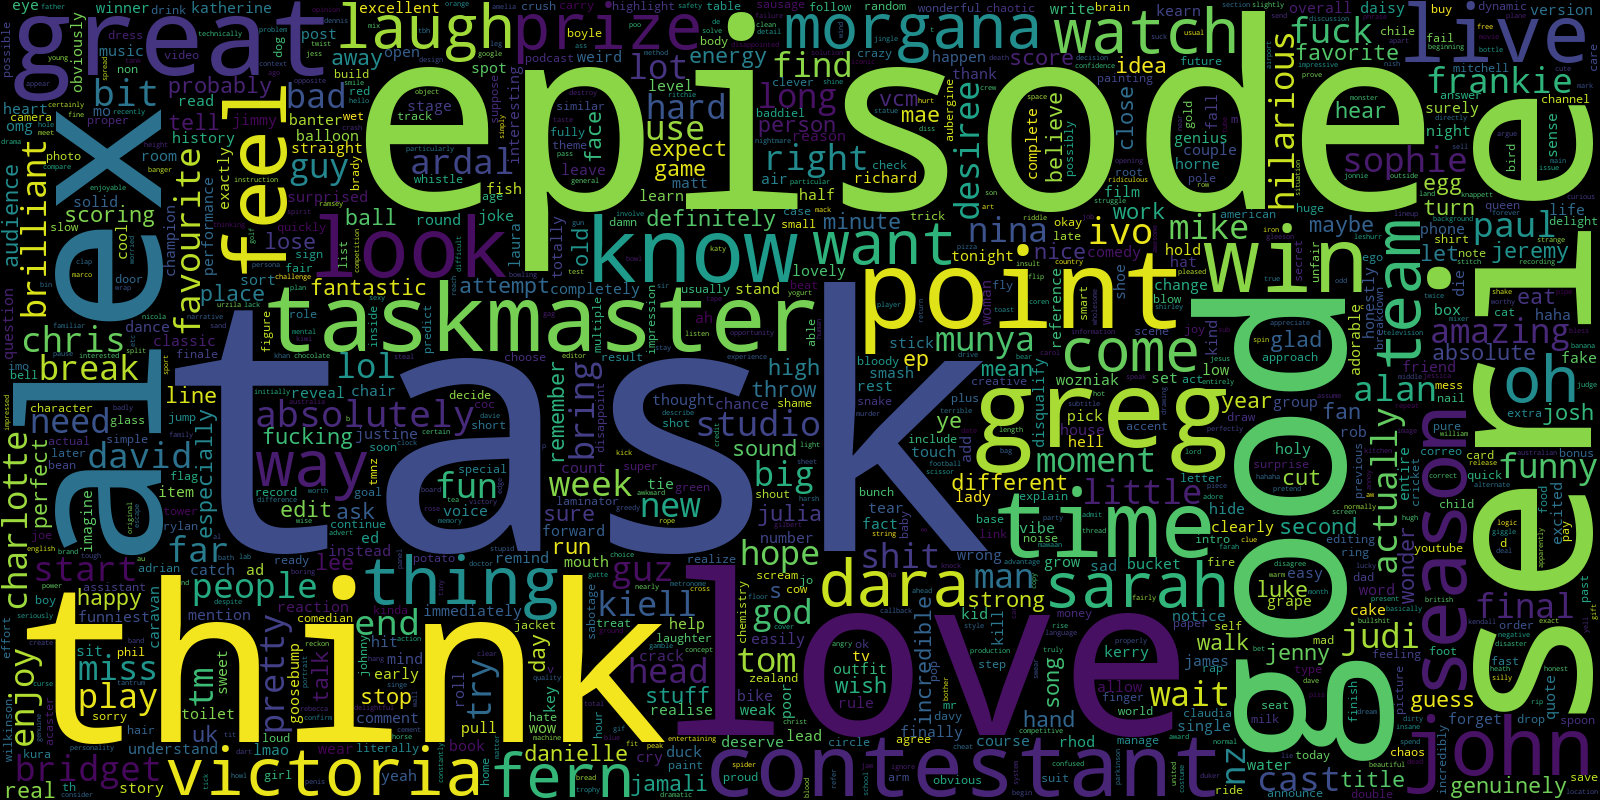

In [67]:
text = ' '.join(data['comment_text'])
wc = WordCloud(max_words = 1000, width = 1600, height = 800, collocations = False).generate(text)
wc.to_image()

In [68]:
vectorizer = TfidfVectorizer(max_features = 500000, ngram_range = (1, 2))
vectorizer.fit(data['comment_text'])
data_transformed = vectorizer.transform(data['comment_text'])
data_transformed.shape

(9894, 72506)

In [74]:
print(data_transformed[0])

  (0, 72162)	0.21467417905160874
  (0, 72108)	0.1430825688075998
  (0, 66003)	0.2513230733536301
  (0, 65990)	0.18062770449881133
  (0, 61899)	0.23299862620261935
  (0, 61320)	0.06673226524091079
  (0, 60404)	0.2513230733536301
  (0, 60403)	0.2513230733536301
  (0, 60093)	0.2513230733536301
  (0, 60092)	0.2513230733536301
  (0, 51037)	0.2513230733536301
  (0, 51018)	0.16843130135554088
  (0, 43305)	0.18455142317822001
  (0, 43236)	0.13498613981528915
  (0, 39947)	0.2513230733536301
  (0, 39939)	0.20625534863638628
  (0, 37402)	0.18155539929924516
  (0, 30657)	0.2513230733536301
  (0, 30654)	0.23299862620261935
  (0, 30653)	0.2513230733536301
  (0, 30652)	0.2513230733536301


# k-means 3 clusters

In [75]:
from sklearn.cluster import MiniBatchKMeans # less than 10000 comments so using minibatch k-means
minikmeans = MiniBatchKMeans(n_clusters = 3, random_state = 42)
minikmeans.fit(data_transformed)

C:\Users\Urszula\Documents\PJATK_ZUM_projekt\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=3, random_state=42)

In [76]:
minikmeans_predictions = minikmeans.predict(data_transformed)

In [78]:
minikmeans_predictions[:15]

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [80]:
np.array(np.unique(minikmeans_predictions, return_counts=True)).T

array([[   0,  400],
       [   1, 9228],
       [   2,  266]], dtype=int64)

# k-means 2 clusters

In [81]:
from sklearn.cluster import MiniBatchKMeans # less than 10000 comments so using minibatch k-means
minikmeans = MiniBatchKMeans(n_clusters = 2, random_state = 42)
minikmeans.fit(data_transformed)
minikmeans_predictions2 = minikmeans.predict(data_transformed)
np.array(np.unique(minikmeans_predictions2, return_counts=True)).T

C:\Users\Urszula\Documents\PJATK_ZUM_projekt\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[   0, 6410],
       [   1, 3484]], dtype=int64)

In [82]:
data['target'] = minikmeans_predictions2
data

,comment_id,comment_text,target
0,100slw5_00001,subscribe task master supermaxplus new year t...,1
1,100slw5_00002,greg james cast series fit alex look series ...,1
2,100slw5_00003,simply appalling introduce lovely hilarious...,0
3,100slw5_00004,sir mo delight need hilariously good sport...,0
4,100slw5_00005,expect come episode absolutely besotte mo fa...,1
...,...,...,...
10211,z9iml6_00239,ladder,0
10212,z9iml6_00240,believe grape book,0
10213,z9iml6_00241,extra grape nz version alex hide,0
10214,z9iml6_00242,dara find grape book,0


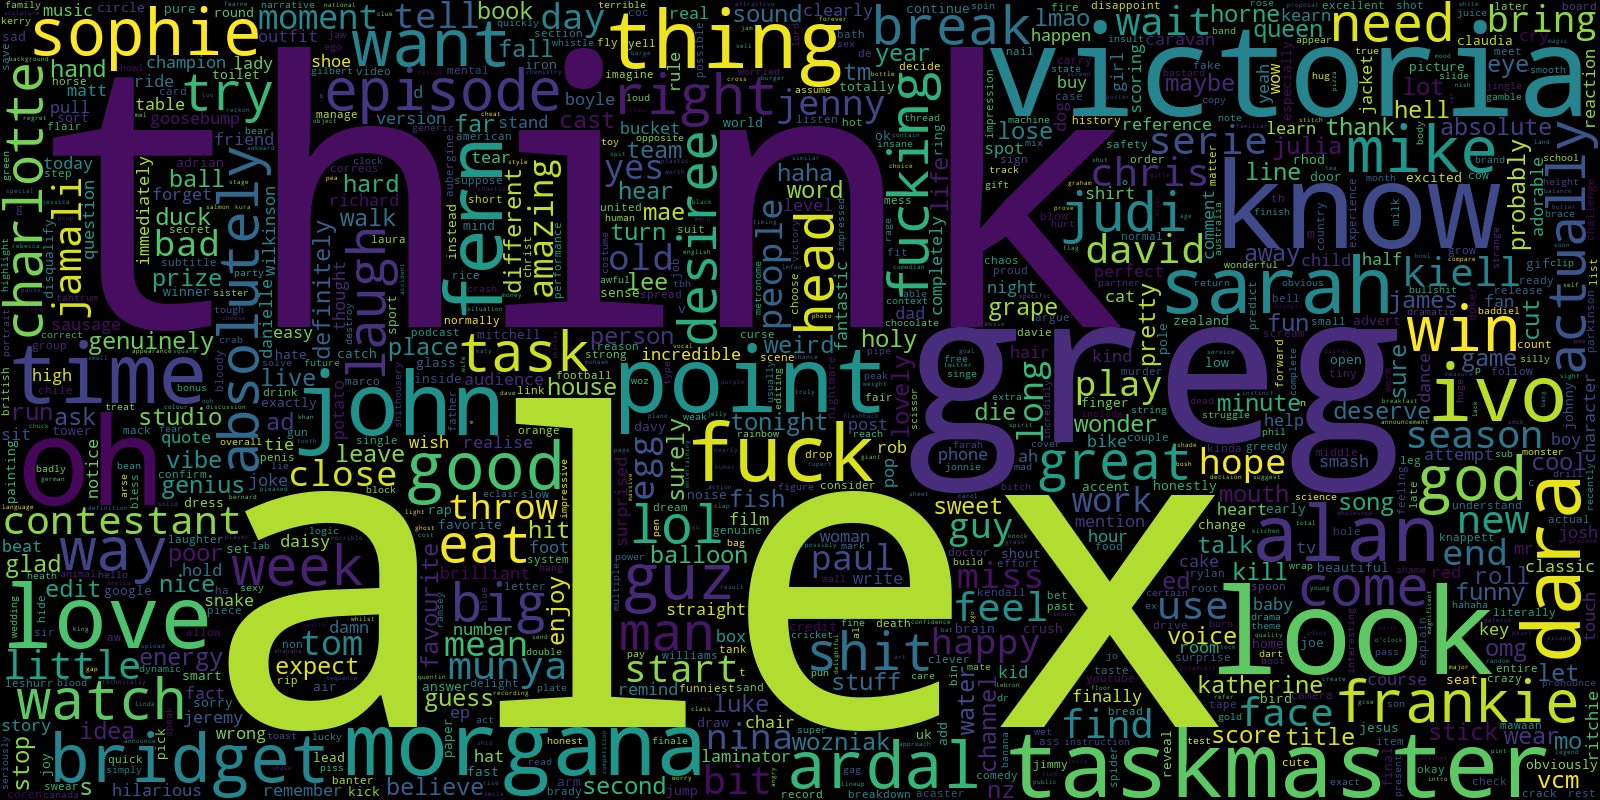

In [83]:
text = ' '.join(data[data['target'] == 0]['comment_text'])
wc = WordCloud(max_words = 1000, width = 1600, height = 800, collocations = False).generate(text)
wc.to_image()
# seem to have more negative words like fuck, bad, shit, kill, disappoint but also positive ones like good, laugh, love

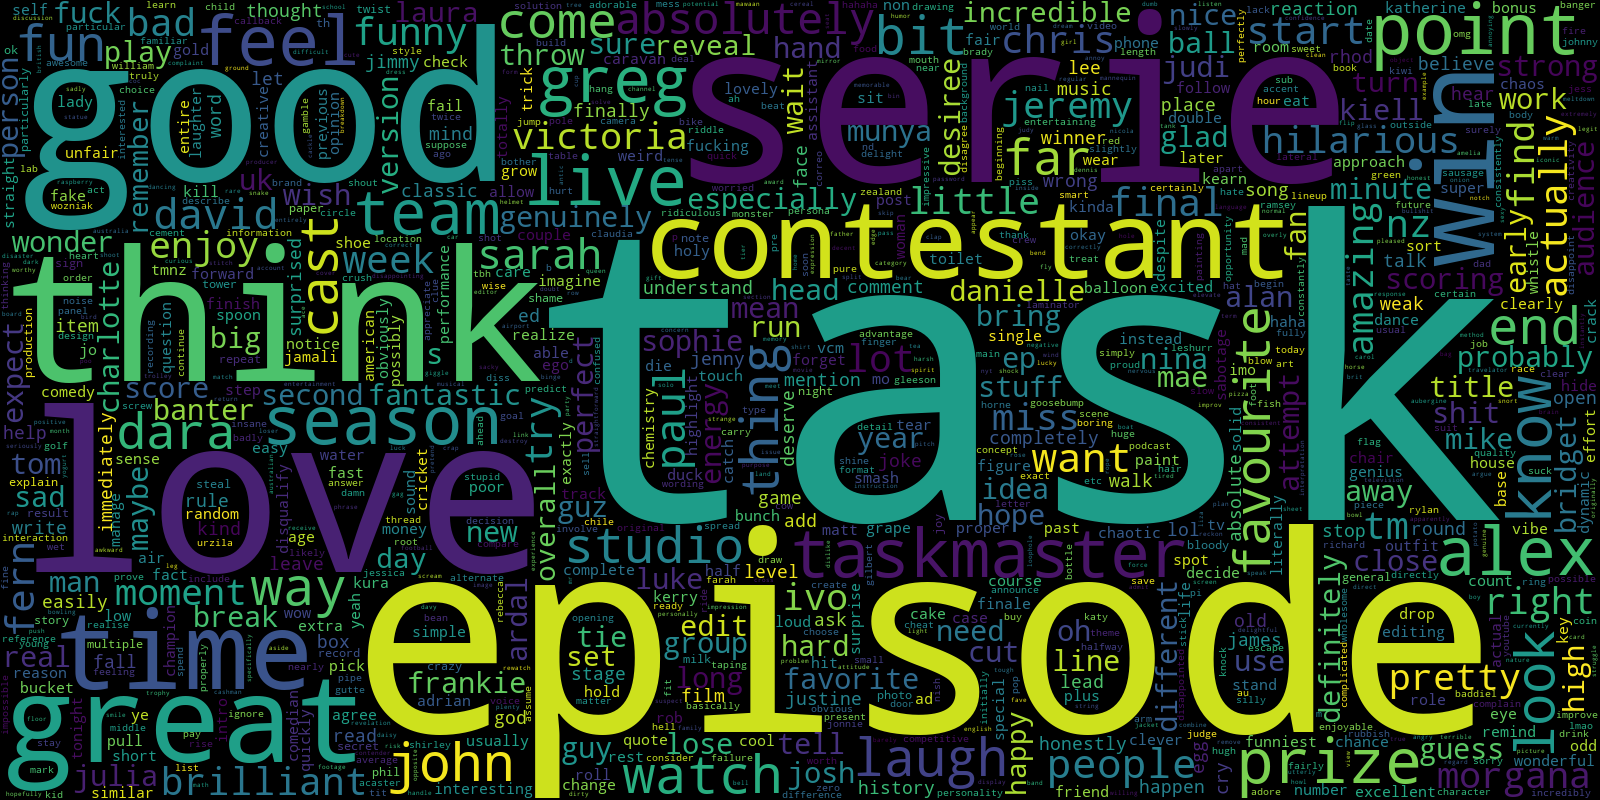

In [84]:
text = ' '.join(data[data['target'] == 1]['comment_text'])
wc = WordCloud(max_words = 1000, width = 1600, height = 800, collocations = False).generate(text)
wc.to_image()
# seem to have more positive words like love, good, funny, incredible
# this is a very simplified approach but we can assume 1 - positive, 0 - negative or neutral
# the proportions (almost 6500 negative or neutral and almost 3500 positive) would also be in line with what the subreddit's discussions are usually about
# people tend to share positive opinions about the episodes or discuss what happened or how they would approach the tasks given to contestants, etc.

In [87]:
data.to_csv('../00_DATA_preprocessed/data_clean_lemmatized_2classes.csv')